In [109]:
import pandas as pd
import re

def import_csv_file(file_path):
    try:
        df = pd.read_csv(file_path, on_bad_lines='skip')
        # delete unnecessary columns
        df = df.drop_duplicates().reset_index(drop=True)
        print(f"✅ データファイル '{file_path}' を正常に読み込みました。")
        return df
    except FileNotFoundError:
        print(f"❌ エラー: ファイルが見つかりません。パスを確認してください: '{file_path}'")
        return None

In [110]:
# create double dimensional list from DataFrame
def parse_triangle_accuracy(df: pd.DataFrame) -> list:
    accuracy_matrix = []  
    current_list = []     
    test_rows = df.dropna(subset=['テスト精度 (Test Acc)'])
    
    for index, row in test_rows.iterrows():
        test_acc = row['テスト精度 (Test Acc)']
        
        if 'dataset_seed' in row and row['dataset_seed'] == 0:
            if current_list == []:
                current_list = [test_acc]
                accuracy_matrix.append(current_list)
            else:
                accuracy_matrix.append(current_list)
                current_list = [test_acc]

        else:
            current_list.append(test_acc)

    if current_list:
        accuracy_matrix.append(current_list)

    del accuracy_matrix[0]  
    return accuracy_matrix


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def get_color_and_linestyle(batch_size, mem):
    # バッチサイズの色（暖色/寒色）
    batch_colors = {
        0: 'tab:green',    
        8: 'tab:red',      
        32: 'tab:orange',
        128: 'tab:blue',  
    }

    mem_linestyle_map = {
        0: '-',           
        500: '--',
        3000: '-.',
        5000: '-'
    }

    # 色設定
    color = batch_colors.get(batch_size, 'black')  # 未定義のバッチサイズは黒

    # 線種設定
    try:
        mem_int = int(mem)
        linestyle = mem_linestyle_map.get(mem_int, ':')  # 未定義のmemは破線（:）
    except:
        linestyle = ':'  # memが整数でない場合のfallback

    return color, linestyle


def plot_task0_accuracy_with_style(all_results, csv_list, meta_info, title):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Task Number")
    plt.ylabel("Test Accuracy on Task0")

    # X軸の最大値を計算（全ての実験で最もタスク数が多いものに合わせる）
    max_tasks = 0
    if all_results:
        max_tasks = max(len(res) for res in all_results)

    # 入力に含まれるmem値とbatch_size値を動的に取得し、昇順で並び替え
    unique_mem = sorted(set(info['mem'] for info in meta_info))
    unique_bs = sorted(set(info['batch_size'] for info in meta_info))

    # mem優先で並び替え（memが外側、bsが内側ループ）
    ordered_combinations = [(mem, bs) for mem in unique_mem for bs in unique_bs]

    for mem, bs in ordered_combinations:
        for i, info in enumerate(meta_info):
            if info['mem'] == mem and info['batch_size'] == bs:
                result_matrix = all_results[i]
                label = csv_list[i]
                color, linestyle = get_color_and_linestyle(bs, mem)

                y_values = [row[0] if len(row) > 0 else None for row in result_matrix]
                x_values = list(range(len(y_values)))

                plt.plot(
                    x_values,
                    y_values,
                    label=f"mem:{mem}, bs:{bs}",
                    color=color,
                    linestyle=linestyle
                )

    # --- ▼▼▼ ここを修正 ▼▼▼ ---
    # X軸の目盛りを0から最大タスク数まで、全ての整数で表示するように設定
    if max_tasks > 0:
        plt.xticks(range(max_tasks))
    # --- ▲▲▲ 修正はここまで ▲▲▲ ---

    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_own_task_accuracy_with_style(all_results, csv_list, meta_info, title):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Task Number")
    plt.ylabel("Test Accuracy on Own Task")

    # X軸の最大値を計算
    max_tasks = 0
    if all_results:
        max_tasks = max(len(res) for res in all_results)

    unique_mem = sorted(set(info['mem'] for info in meta_info))
    unique_bs = sorted(set(info['batch_size'] for info in meta_info))
    ordered_combinations = [(mem, bs) for mem in unique_mem for bs in unique_bs]

    for mem, bs in ordered_combinations:
        for i, info in enumerate(meta_info):
            if info['mem'] == mem and info['batch_size'] == bs:
                result_matrix = all_results[i]
                label = csv_list[i]
                color, linestyle = get_color_and_linestyle(bs, mem)

                y_values = []
                for idx, row in enumerate(result_matrix):
                    if len(row) > idx:
                        y_values.append(row[idx])
                    else:
                        y_values.append(None)

                x_values = list(range(len(y_values)))

                plt.plot(
                    x_values,
                    y_values,
                    label=f"mem:{mem}, bs:{bs}",
                    color=color,
                    linestyle=linestyle
                )

    # --- ▼▼▼ ここを修正 ▼▼▼ ---
    # X軸の目盛りを0から最大タスク数まで、全ての整数で表示するように設定
    if max_tasks > 0:
        plt.xticks(range(max_tasks))
    # --- ▲▲▲ 修正はここまで ▲▲▲ ---

    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Task Number")
    plt.ylabel("Test Accuracy on Own Task")


✅ データファイル '/work/test/DIL/random_baseline.csv' を正常に読み込みました。
[[0.9472155570983888], [0.3342347741127014, 0.91776841878891], [0.2186498343944549, 0.4834735691547394, 0.9180688858032228], [0.1393229216337204, 0.2220552861690521, 0.3988381326198578, 0.9235777258872986], [0.1272035241127014, 0.2626201808452606, 0.3341346085071563, 0.5232371687889099, 0.9230769276618958], [0.1513421535491943, 0.2256610542535781, 0.1909054517745971, 0.2666265964508056, 0.4689503312110901, 0.9293870329856871], [0.1283052861690521, 0.1773838102817535, 0.1966145783662796, 0.1550480723381042, 0.3066906929016113, 0.5082131624221802, 0.9235777258872986], [0.1190905421972274, 0.1607572138309478, 0.2050280421972274, 0.1771834939718246, 0.1923076957464218, 0.2713341414928436, 0.3719951808452606, 0.9310897588729858], [0.1586538404226303, 0.1750801354646682, 0.1302083283662796, 0.1393229216337204, 0.1248998418450355, 0.1909054517745971, 0.2565104067325592, 0.4477163553237915, 0.9230769276618958], [0.0962540060281753, 0.

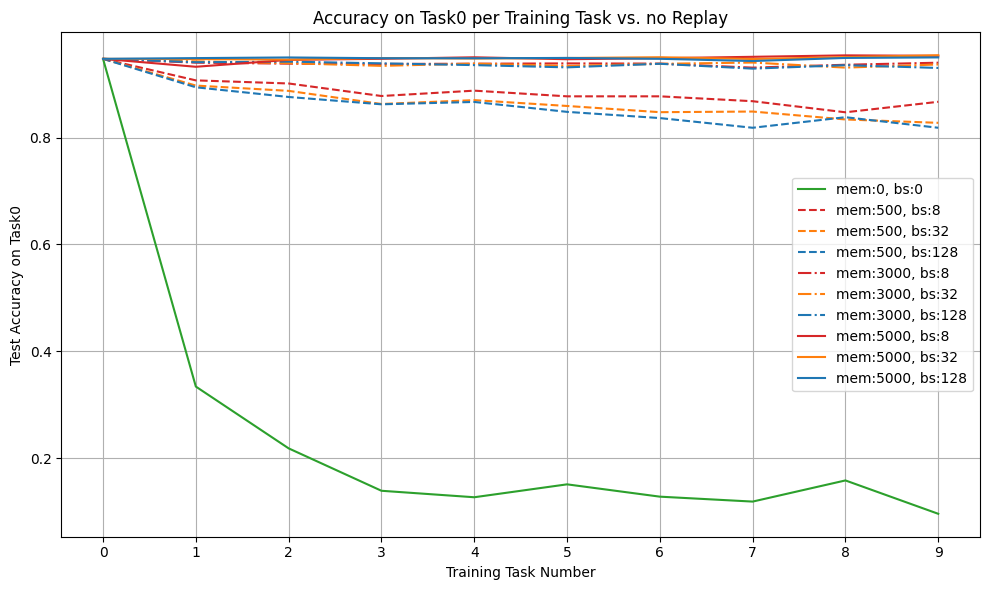

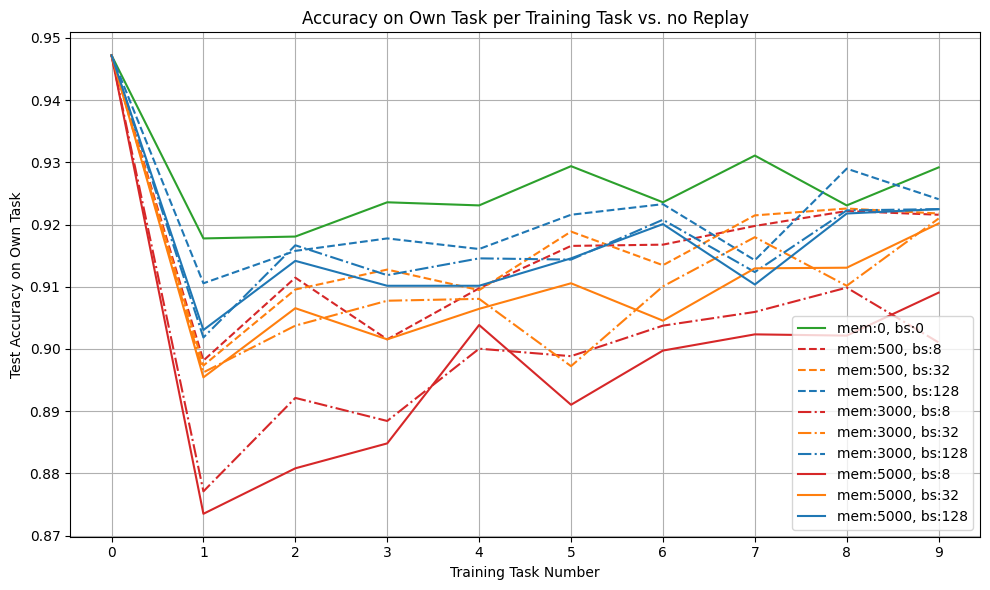

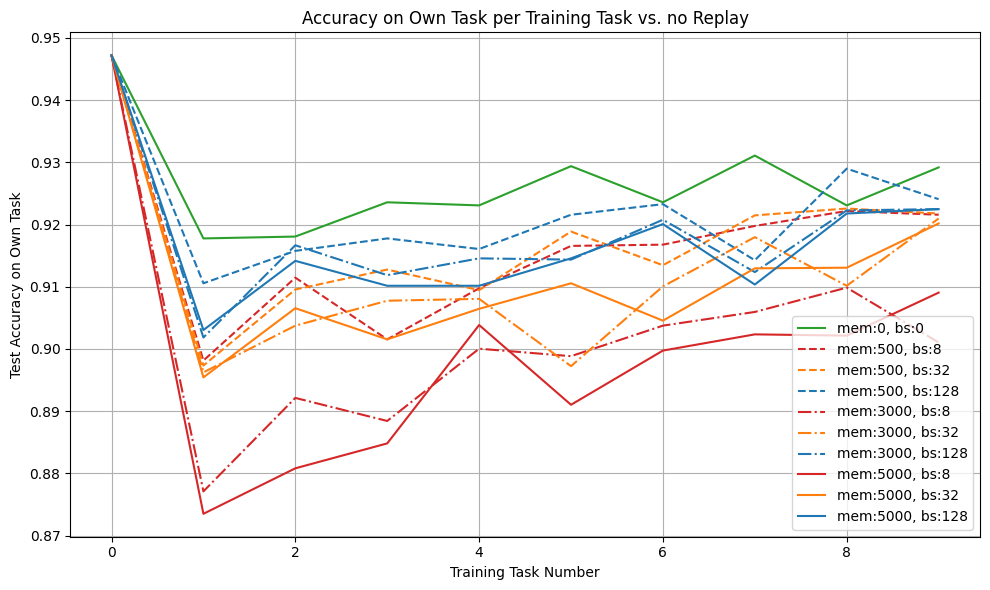

In [112]:

# 例: CSVファイルのパスリスト
csv_list = ["/work/test/DIL/random_baseline.csv","/work/test/DIL/er_sweep_mem5000_bs8.csv", "/work/test/DIL/er_sweep_mem500_bs8.csv", "/work/test/DIL/er_sweep_mem3000_bs8.csv","/work/test/DIL/er_sweep_mem5000_bs32.csv", "/work/test/DIL/er_sweep_mem500_bs32.csv", "/work/test/DIL/er_sweep_mem3000_bs32.csv","/work/test/DIL/er_sweep_mem5000_bs128.csv", "/work/test/DIL/er_sweep_mem500_bs128.csv", "/work/test/DIL/er_sweep_mem3000_bs128.csv"]
meta_info = [
    {'batch_size': 0, 'mem': 0},
    {'batch_size': 8, 'mem': 5000},
    {'batch_size': 8, 'mem': 500},
    {'batch_size': 8, 'mem': 3000},
    {'batch_size': 32, 'mem': 5000},
    {'batch_size': 32, 'mem': 500},
    {'batch_size': 32, 'mem': 3000},
    {'batch_size': 128, 'mem': 5000},
    {'batch_size': 128, 'mem': 500},
    {'batch_size': 128, 'mem': 3000},
]
all_results = []

print(parse_triangle_accuracy(import_csv_file("/work/test/DIL/random_baseline.csv")))  # ベースラインのCSVを読み込む
for csv_file in csv_list:
    df = import_csv_file(csv_file)
    result = parse_triangle_accuracy(df)
    all_results.append(result)
    
# 各CSVファイルのタスク0のテスト精度をプロット
plot_task0_accuracy_with_style(all_results, csv_list, meta_info, "Accuracy on Task0 per Training Task vs. no Replay")
# 最後に共通グラフを描画
plot_own_task_accuracy_with_style(all_results, csv_list, meta_info, "Accuracy on Own Task per Training Task vs. no Replay")


✅ データファイル '/work/test/DIL/random_baseline.csv' を正常に読み込みました。
✅ データファイル '/work/test/DIL/er_sweep_mem5000_bs8.csv' を正常に読み込みました。
✅ データファイル '/work/test/DIL/er_sweep_mem500_bs8.csv' を正常に読み込みました。
✅ データファイル '/work/test/DIL/er_sweep_mem5000_bs32.csv' を正常に読み込みました。
✅ データファイル '/work/test/DIL/er_sweep_mem500_bs32.csv' を正常に読み込みました。
✅ データファイル '/work/test/DIL/er_sweep_mem5000_bs128.csv' を正常に読み込みました。
✅ データファイル '/work/test/DIL/er_sweep_mem500_bs128.csv' を正常に読み込みました。


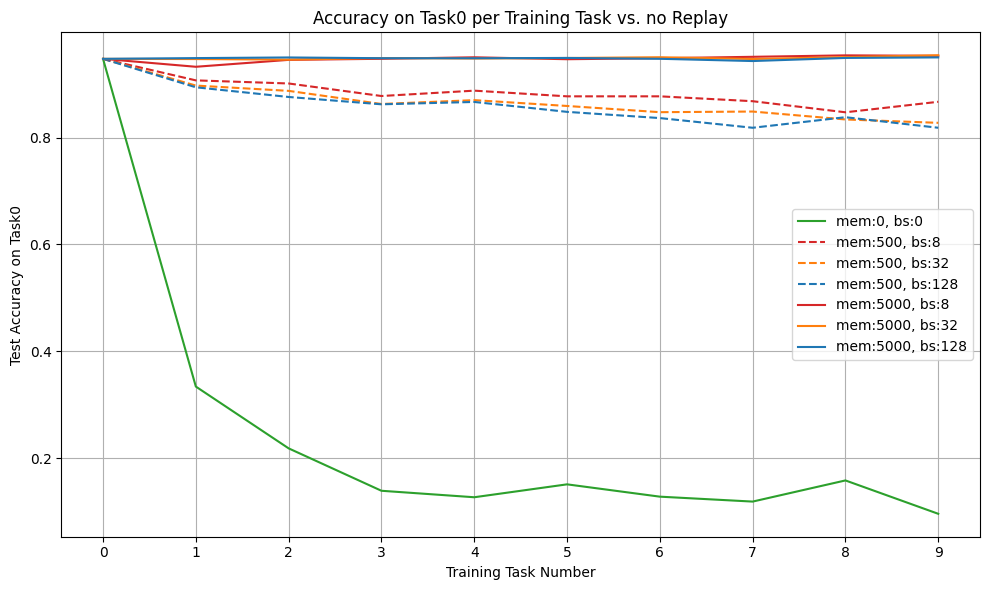

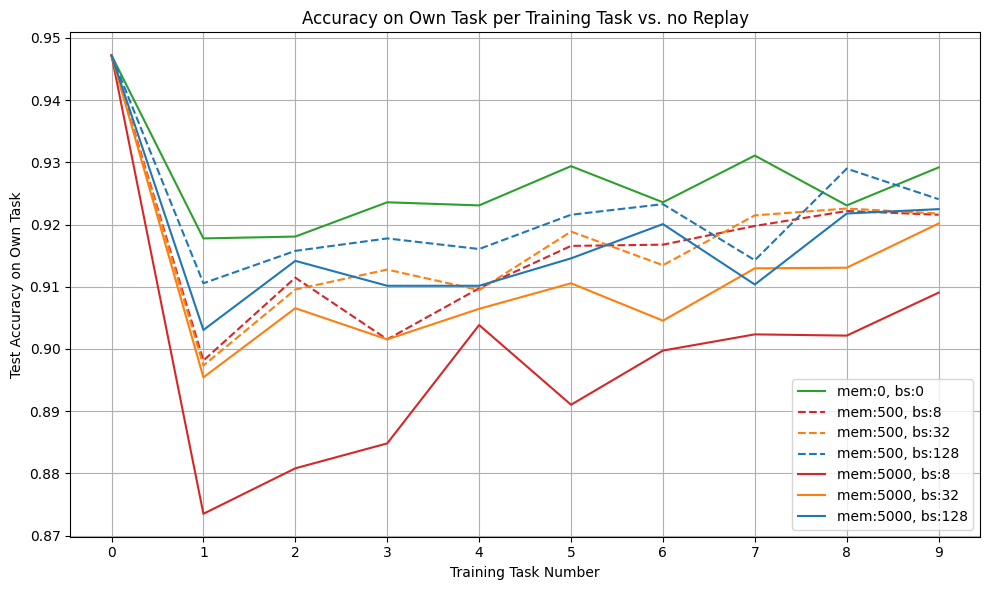

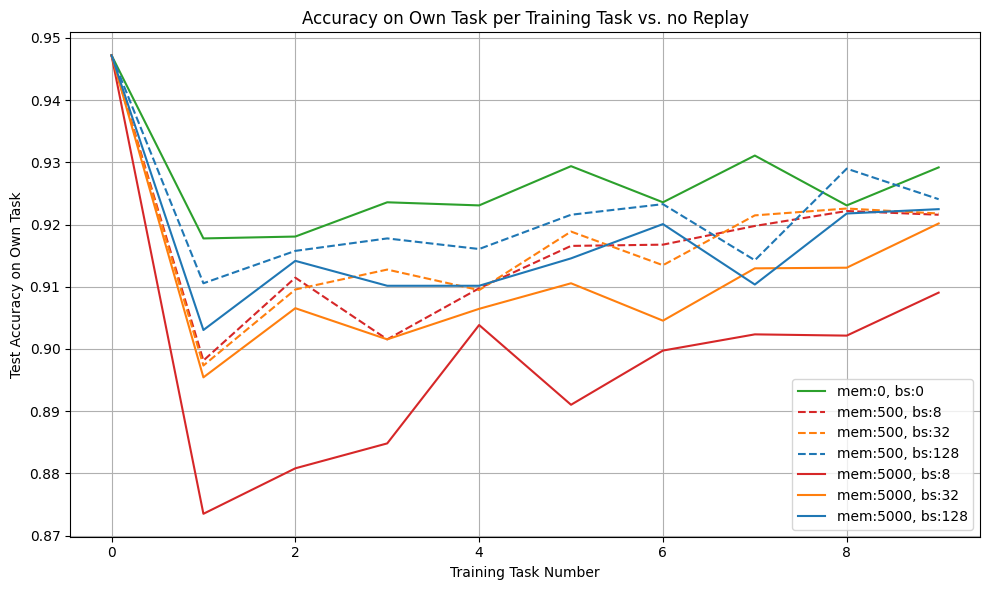

In [113]:

# 例: CSVファイルのパスリスト
csv_list = ["/work/test/DIL/random_baseline.csv","/work/test/DIL/er_sweep_mem5000_bs8.csv", "/work/test/DIL/er_sweep_mem500_bs8.csv", "/work/test/DIL/er_sweep_mem5000_bs32.csv", "/work/test/DIL/er_sweep_mem500_bs32.csv", "/work/test/DIL/er_sweep_mem5000_bs128.csv", "/work/test/DIL/er_sweep_mem500_bs128.csv"]
meta_info = [
    {'batch_size': 0, 'mem': 0},
    {'batch_size': 8, 'mem': 5000},
    {'batch_size': 8, 'mem': 500},
    {'batch_size': 32, 'mem': 5000},
    {'batch_size': 32, 'mem': 500},
    {'batch_size': 128, 'mem': 5000},
    {'batch_size': 128, 'mem': 500},
]
all_results = []

for csv_file in csv_list:
    df = import_csv_file(csv_file)
    result = parse_triangle_accuracy(df)
    all_results.append(result)
    
# 各CSVファイルのタスク0のテスト精度をプロット
plot_task0_accuracy_with_style(all_results, csv_list, meta_info, "Accuracy on Task0 per Training Task vs. no Replay")
# 最後に共通グラフを描画
plot_own_task_accuracy_with_style(all_results, csv_list, meta_info, "Accuracy on Own Task per Training Task vs. no Replay")
